In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import distribution_generator as dg
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



from random import lognormvariate, normalvariate

from sklearn.neighbors import KernelDensity

import imports
import os
import json

from IPython.display import Audio
sound_file = './call.wav'

In [2]:
ALLERT = Audio(url=sound_file, autoplay=True)

KS tests for Cassandra runs

HERE I START WORKING WITH NEW RD FORMAT

***********************************************************************



In [3]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [4]:
def plotDensity(densities, log_flag = False, height = 4, width = 12, left = None, right = None, axes_limits = None,
               colors = None, name = None):
    
    if type(densities[0]) != list and type(densities[0]) != np.ndarray:
        densities = [densities]
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(1,1,1)

    if axes_limits:
        ax.axis(axes_limits)
        ax = plt.gca()
        ax.set_autoscale_on(False)

    if left is None:
        left = 0
    if right is None:
        right = len(densities[0])
        
    for i in range(len(densities)):
        density = densities[i]
        if colors is None:
            ax.plot(density[left : right])
        else:
            ax.plot(density[left : right], colors[i])
   
    if not name is None: 
        fig.savefig(name)
    if log_flag:
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.show()

In [5]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"


runs = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("READ.rd"):
        x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)
        
        
        if run_file_name.split('-')[3] == '600':
            runs[run_file_name.split('-')[0]].insert(0, curr_pdf)
        if run_file_name.split('-')[3] == '1800':
            runs[run_file_name.split('-')[0]].append(curr_pdf)
        
        print run_file_name

asasas
Granada-d-10000-600-2016.04.08-13.27.33-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.16.33-ycsb-run-READ.rd
asasas
Dev-d-10000-1800-2016.04.08-15.59.41-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-08.44.09-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.15.11-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.34.53-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.44.42-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.19.19-ycsb-run-READ.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-READ.rd
asasas
Granada-d-10000-600-2016.04.08-13.02.39-ycsb-run-READ.rd
asasas
Dev-d-10000-600-2016.04.08-15.22.26-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-13.39.55-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016.04.08-08.06.57-ycsb-run-READ.rd
asasas
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-READ.rd
asasas
Highlander-d-10000-600-2016

In [6]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"


runs_ins = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("INSERT.rd"):
        x, curr_pdf, curr_cdf = imports.readRD(run_file_name, runs_dir, scale = True)
        
        
        if run_file_name.split('-')[3] == '600':
            runs_ins[run_file_name.split('-')[0]].insert(0, curr_pdf)
        if run_file_name.split('-')[3] == '1800':
            runs_ins[run_file_name.split('-')[0]].append(curr_pdf)
        
        print run_file_name

asasas
Granada-d-10000-600-2016.04.08-13.15.11-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-14.44.42-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.34.53-ycsb-run-INSERT.rd
asasas
Dev-d-10000-1800-2016.04.08-15.59.41-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.31.44-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-08.44.09-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.06.57-ycsb-run-INSERT.rd
asasas
Granada-d-10000-1800-2016.04.08-13.39.55-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.22.26-ycsb-run-INSERT.rd
asasas
Granada-d-10000-600-2016.04.08-13.27.33-ycsb-run-INSERT.rd
asasas
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-600-2016.04.08-08.19.19-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-INSERT.rd
asasas
Highlander-d-10000-1800-2016.04.08-09.16.33-ycsb-run-INSERT.rd
a

In [7]:
def buildtrustedInterval(percentile_sample, interval):
    percentile_std = np.std(percentile_sample)
    percentile_mean = np.mean(percentile_sample)
    
    return percentile_mean,stats.norm.ppf(1 - (1 - interval)/ 2, loc = percentile_mean, scale = percentile_std), 2 *percentile_mean - stats.norm.ppf(1 - (1 - interval)/ 2, loc = percentile_mean, scale = percentile_std)

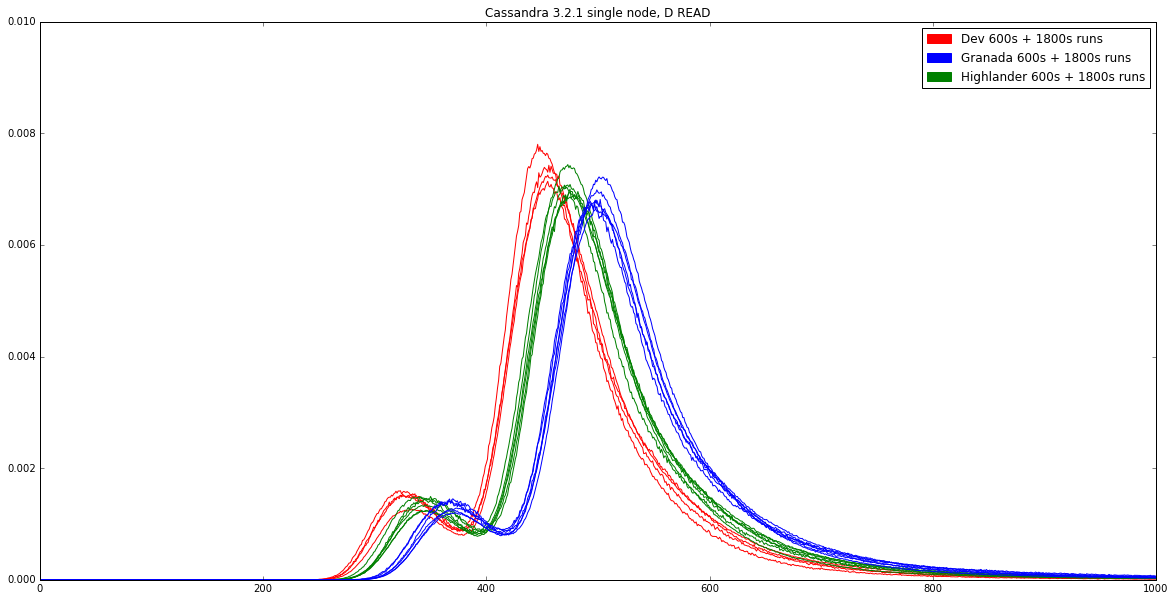

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

axes_limits = [0,1000, 0, 0.01]
colors = ['r']*4 + ['g']*6 + ['b']*6
densities = runs['Dev'] + runs['Highlander'] + runs['Granada']

if len(axes_limits) == 4: 
    ax.axis(axes_limits)
    ax = plt.gca()
    ax.set_autoscale_on(False)

for i in range(len(densities)):
    density = densities[i]
    if colors is None:
        ax.plot(density)
    else:
        ax.plot(density, colors[i])

red_patch = mpatches.Patch(color='red', label='Dev 600s + 1800s runs')
blue_patch = mpatches.Patch(color='blue', label='Granada 600s + 1800s runs')
green_patch = mpatches.Patch(color='green', label='Highlander 600s + 1800s runs')
ax.legend(handles=[red_patch, blue_patch, green_patch])
ax.set_title("Cassandra 3.2.1 single node, D READ", loc = 'center')

fig.savefig('DevHlanderGran.png')

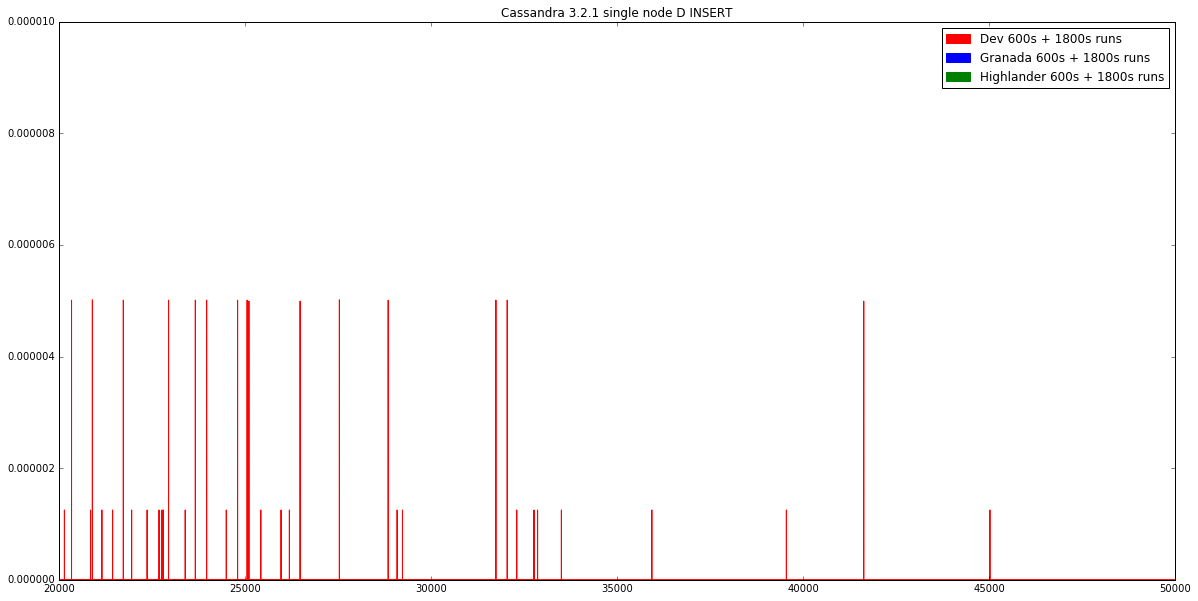

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

axes_limits = [20000,50000, 0, 0.00001]
colors = ['r']*4 + ['g']*6 + ['b']*6
densities_ins = runs_ins['Dev']# + runs_ins['Highlander'] + runs_ins['Granada']

if len(axes_limits) == 4: 
    ax.axis(axes_limits)
    ax = plt.gca()
    ax.set_autoscale_on(False)

for i in range(len(densities_ins)):
    density = densities_ins[i]
    if colors is None:
        ax.plot(density)
    else:
        ax.plot(density, colors[i])

red_patch = mpatches.Patch(color='red', label='Dev 600s + 1800s runs')
blue_patch = mpatches.Patch(color='blue', label='Granada 600s + 1800s runs')
green_patch = mpatches.Patch(color='green', label='Highlander 600s + 1800s runs')
ax.legend(handles=[red_patch, blue_patch, green_patch])
ax.set_title("Cassandra 3.2.1 single node D INSERT", loc = 'center')

fig.savefig('DevHlanderGran_Ins.png')

This Highlander run is better than others and it is the last one 
Highlander-d-10000-1800-2016.04.08-09.48.58-ycsb-run-READ.rd

It's also last for Granada
Granada-d-10000-1800-2016.04.08-14.12.18-ycsb-run-READ.rd

For Dev it's not
Dev-d-10000-600-2016.04.08-15.47.16-ycsb-run-READ.rd

### PLAY WITH LOGNORMAL

In [13]:
def lgnrm(x, mu = 1, sigma = 1):
    return 1.0 / (np.sqrt(2*np.pi)*sigma*x)  * np.exp(-(np.log(x) - mu)**2 / (2*sigma**2) )

def lgnrmMix(x, p1, p2, mu1, mu2, sigma1, sigma2):
    return p1*lgnrm(x,mu1,sigma1) + p2*lgnrm(x,mu2,sigma2)

In [16]:
from itertools import product

mu1_range = np.linspace(5.5, 8, 10)
mu2_range = np.linspace(6, 9, 15)
sigma1_range = np.linspace(6, 10, 10)
sigma2_range = np.linspace(6, 12, 15)
p1 = 0.091
p2 = 1 - p1

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0

for mu1,mu2,sigma1,sigma2 in product(mu1_range,mu2_range, sigma1_range, sigma2_range):
    curr_err = np.sum(abs(lgnrmMix(np.arange(1, 1000), p1, p2, mu1, mu2, sigma1, sigma2) - test[1:1000]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2

NameError: name 'test' is not defined

In [17]:
print min_mu1
print min_mu2
print min_sigma1
print min_sigma2

0
0
0
0


In [15]:
plotDensity([lgnrmMix(np.array(range(1,1000)),p1, p2, min_mu1 , min_mu2,min_sigma1,min_sigma2), test])

NameError: name 'test' is not defined

In [375]:
mu1_range = np.linspace(6, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.15, 100)
p1_range = np.linspace(0.5, 0.9, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(420, 520), mu1, sigma1) - test[420:520]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [376]:
print min_mu1
print min_sigma1
print min_p1


6.17676767677
0.080303030303
0.677777777778


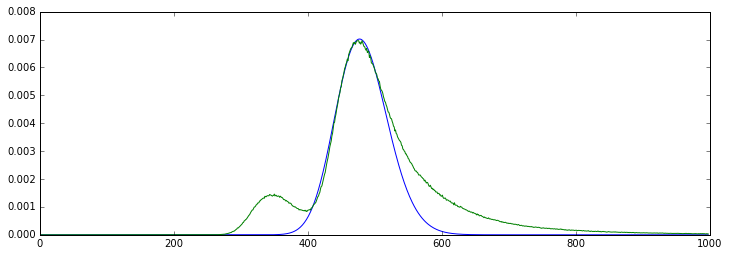

In [387]:
mu_1 = min_mu1
sigma_1 = min_sigma1
p_1 = min_p1

plotDensity([p_1 *lgnrm(np.array(range(1, 1000)),mu_1, sigma_1), test[1:1000]], name = '1iter.png')



In [399]:
test_2 = - p_1 *lgnrm(np.array(range(1, 1000)),mu_1, sigma_1) + test[1:1000]
mu1_range = np.linspace(5, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.1, 100)
p1_range = np.linspace(0.08, 0.11, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(320, 420), mu1, sigma1) - test_2[320:420]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [400]:
print min_mu1
print min_sigma1
print min_p1


5.86363636364
0.0808080808081
0.103333333333


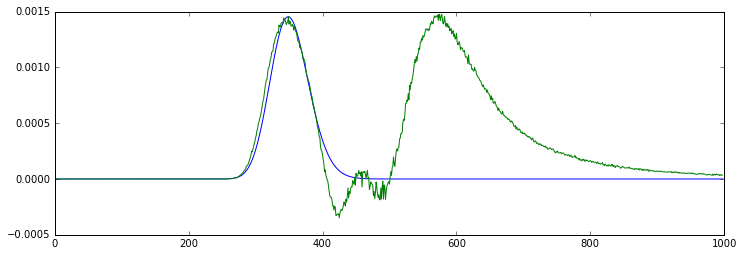

In [401]:
plotDensity([ min_p1 *lgnrm(np.array(range(1, 1000)),min_mu1, min_sigma1), test_2[1:1000]], name = 'iter2.png')

In [393]:
mu_2 = min_mu1
sigma_2 = min_sigma1
p_2 = min_p1


In [394]:
test_3 = test_2 - p_2 *lgnrm(np.array(range(1, 1000)),mu_2, sigma_2)

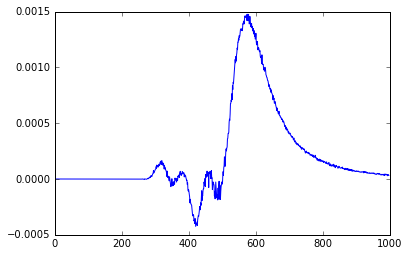

In [395]:
plt.plot(test_3)

In [402]:
mu1_range = np.linspace(5, 6.5, 100)
sigma1_range = np.linspace(0.05, 0.3, 100)
p1_range = np.linspace(0.01, 0.3, 10)

min_err = 10000
min_mu1 = 0
min_mu2 = 0
min_sigma1 = 0
min_sigma2 = 0
min_p1 = 0

for mu1,sigma1,p1 in product(mu1_range, sigma1_range, p1_range):
    curr_err = np.sum(abs(p1 * lgnrm(np.arange(510, 820), mu1, sigma1) - test_3[510:820]))
    if curr_err < min_err:
        min_err = curr_err
        min_mu1 = mu1
        min_mu2 = mu2
        min_sigma1 = sigma1
        min_sigma2 = sigma2
        min_p1 = p1

In [403]:
print min_mu1
print min_sigma1
print min_p1


6.37878787879
0.128282828283
0.235555555556


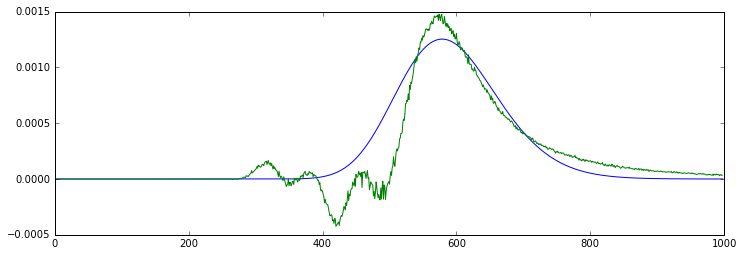

In [404]:
plotDensity([ min_p1 *lgnrm(np.array(range(1, 1000)),min_mu1, min_sigma1), test_3[1:1000]], name = 'iter3.png')

In [366]:
p = np.poly1d(np.polyfit(np.arange(1000), test[:1000], 100 ))

/home/anton/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


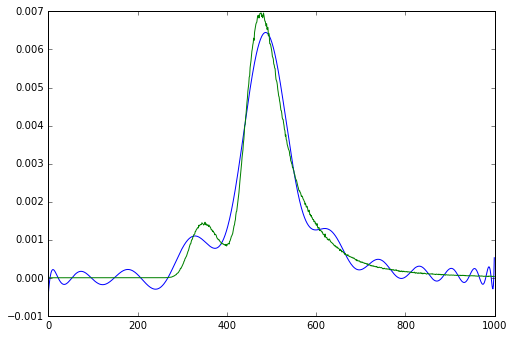

In [367]:
plotDensity([p(np.arange(1000)), test[:1000]])

In [276]:

import scipy.integrate as integrate

result = integrate.quad(lgnrm, 0, 10000, args = (6, 0.3))

print result

(1.0, 4.454159844180103e-13)


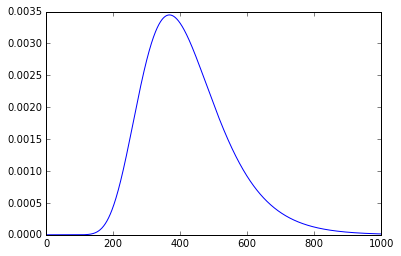

In [273]:
plt.plot(lgnrm(np.arange(1,1000, 1), 6, 0.3))

In [19]:
from sklearn.grid_search import GridSearchCV
import sklearn.cross_validation as CV

params = {'bandwidth' :np.arange(1, 7, 1)}
grid_searcher = GridSearchCV(KernelDensity(), params, cv = 5, n_jobs=-1, verbose = 3)
grid_searcher.fit(samples_for_KDE[:np.newaxis].reshape(-1,1))

print grid_searcher.best_score_
print grid_searcher.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
-93441.4044085
KernelDensity(algorithm='auto', atol=0, bandwidth=6, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=2 .....................................................
[CV] bandwidth=1 .....................................................
[CV] bandwidth=2 .....................................................
[CV] bandwidth=2 .....................................................
[CV] ....................... bandwidth=1, score=-53698.036731 -  12.3s[CV] ..................... bandwidth=1, score=-2016526.316603 -  12.0s[CV] ..................... bandwidth=1, score=-58

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


In [ ]:
kde = KernelDensity()
kde.fit(imports.sampleFromDensity(train_data[0], 1000).reshape(-1,1) )

In [ ]:
plt.plot(np.exp(kde.score_samples(np.linspace(0,200,200).reshape(-1,1))))

In [ ]:
train_data[0].reshape(-1,1).shape

In [ ]:
np.linspace(0,200,200).reshape(-1,1).shape

In [ ]:
(train_data_samples).shape

### GO TRY LN WITH INSERT

In [106]:
from scipy.optimize import curve_fit

In [30]:
popt, pcov = curve_fit(lgnrm, np.arange(1,1000, 1), runs_ins['Highlander'][0][:999])

In [54]:
pcov

array([[  4.89828468e-07,   1.86141959e-08],
       [  1.86141959e-08,   3.27249101e-07]])

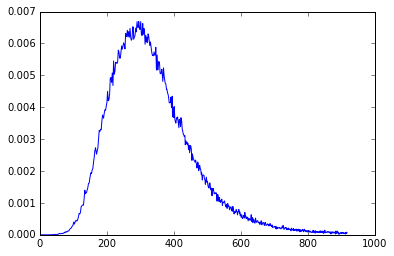

In [67]:
plt.plot((np.log(np.arange(400, 1001, 1))*1000 - 5990).astype(int),(runs_ins['Highlander'][0][400:1001]))
plt.show()

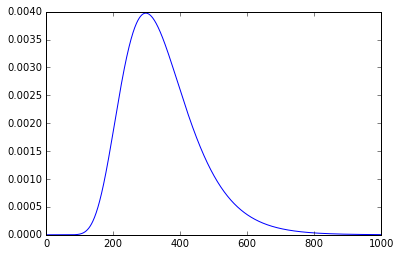

In [76]:
plt.plot(lgnrm(np.arange(1, 1000), 5.8, 0.32))
plt.show()

In [64]:
temp_X = (np.log(np.arange(400, 1001, 1))*1000 - 5990).astype(int)

In [65]:
def lgn(params):
    mu = params[0]
    sigma = params[1]
    
    return sum([abs(lgnrm(x[i], mu, sigma) - runs_ins['Highlander'][0][400 + i]) for i in range(600)])

In [79]:
from scipy.optimize import minimize

In [80]:
params = [6, 0.2]

res = minimize(lgn, params)

In [81]:
res.x

array([ 6. ,  0.2])

In [270]:
hist = np.histogram(imports.sampleFromDensity(runs_ins["Highlander"][0], 4000000), density=True, bins=bins)

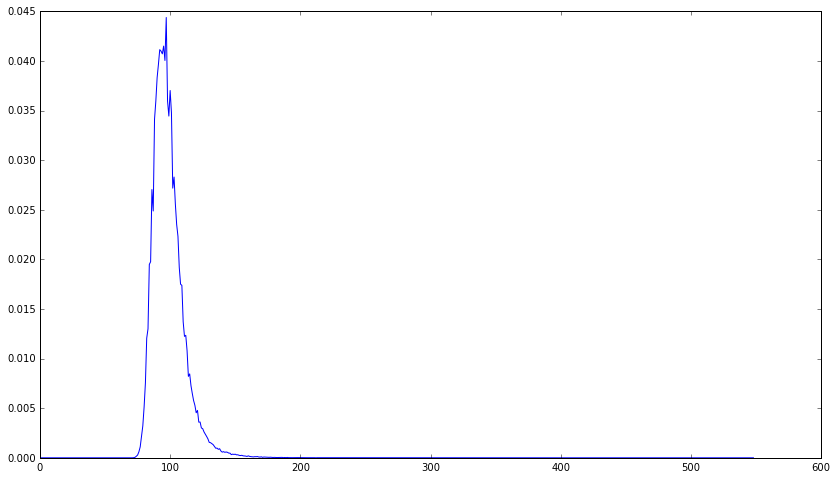

In [275]:
plotDensity([y[450:],
            lgnrm(np.arange(1, 1000), 6.91, 0.098)],
           
           height = 8,
           width = 14)


In [272]:
y = hist[0] / sum(hist[0])


In [181]:
from scipy.optimize import curve_fit

In [182]:
x = np.linspace(1, 5500, 5499)

In [201]:
curve_fit(lgnrm, x, y[4500:] / sum(y[4500:]), p0= (7, 0.1))

(array([ 6.87937231,  0.09820807]),
 array([[  2.07372457e-06,   6.79910903e-08],
        [  6.79910903e-08,   1.38468737e-06]]))

In [200]:
sum(y[4500:])

1.0000000000000009

In [202]:
np.log(1000)

6.9077552789821368

In [ ]:
bins2 = np.logspace(1, 5, )

In [266]:
hist2 = np.histogram(imports.sampleFromDensity(runs_ins["Highlander"][0], 4000000), density=True, bins=bins)

In [267]:
hist3 = np.histogram(sampleFromDensity(hist2[0], 4000000, scaling= True),  density=True, bins=bins)[0]

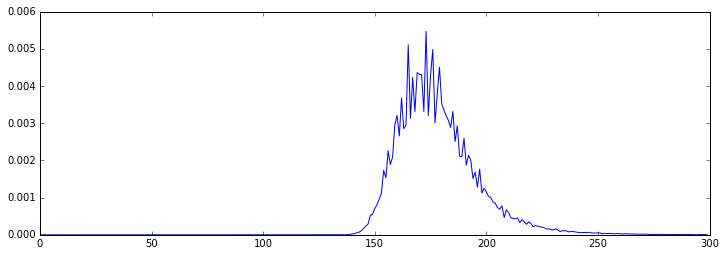

In [268]:
plotDensity(hist3[7300:7600])

In [232]:
hist3

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [217]:
p = 0.5

In [7]:
from statsmodels.nonparametric import bandwidths

In [11]:
bandwidths.bw_scott(np.random.normal(0, 1, 100))

0.44839437551644462

In [55]:
size = 4000000

cum_samp = sampleFromDensity(runs['Highlander'], size)
density = np.histogram(cum_samp, max(cum_samp), density=True)[0]

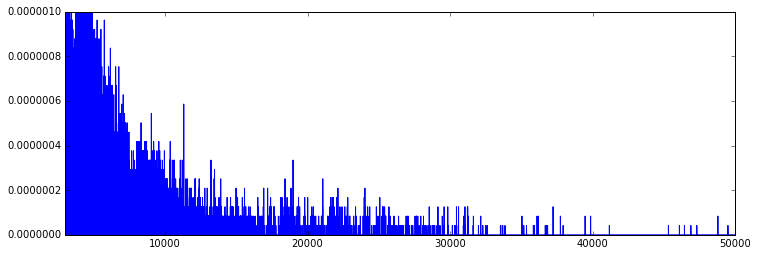

In [58]:
plotDensity(density,
           axes_limits = [3000,50000, 0, 0.000001])

# USefulL funCs

In [9]:
def searchBoarders(density, i, bw):
    left_boarder = i
    right_boarder = i
    
    if bw % 2 == 0:
        bw += 1
        
    right_saturation = (bw - 1) / 2
    left_saturation = (bw - 1) / 2
    
    while left_saturation > 0 and left_boarder > 0:
        if density[left_boarder] > 0:
            left_saturation -= 1
        left_boarder -= 1
    
    while right_saturation > 0 and right_boarder < len(density) - 1:
        if density[right_boarder] > 0:
            right_saturation -= 1
        right_boarder += 1
        
    if right_saturation == 0 and left_saturation == 0:
        return left_boarder, right_boarder
    elif right_saturation == 0 and left_saturation != 0:
        return max(0, right_boarder - i), right_boarder
    elif left_saturation == 0 and right_saturation != 0:
        return left_boarder, i + i - left_boarder
    else:
        return 0, len(density)

In [10]:
def flattenDensities(densities, bw = 3): 
    #max_bw = np.where(density > 0)[0][0]
    new_densities = []
    
    if type(densities[0]) != np.ndarray and type(densities[0]) != list:
        print 'Type changing...'
        densities = [densities]
        
    for density in densities:

        new_density = np.zeros(len(density)*2)

        saturation = 0

        for i in range(len(density)):
            if density[i] == 0:
                pass
            else:
                left_boarder, right_boarder = searchBoarders(density, i, bw)
                for j in range(left_boarder, right_boarder):
                    new_density[j] += density[i] / (right_boarder - left_boarder)
        
        new_densities.append(new_density)

    return new_densities
    

In [11]:
def sampleFromDensity(densities, sample_size = 1000, scaling = False):
    sample = np.empty(0)
    for density in densities:
        if scaling:
            density = density / sum(density)
        curr_sample = np.random.choice(range(len(density)), sample_size / len(densities), p = density)
        sample = np.hstack((sample, curr_sample))
    return sample

In [12]:
def densityFromSample(sample, normed = True):
    return np.histogram(sample, bins=round(max(sample) + 1) , 
                        density=True, range = (0, round(max(sample) +1)))

In [13]:
def percentileBootstrap(pdfs, percentiles_set, percentiles_sample_size = 10, sample_size = 1000, scaling = True):
    percentiles_vals = dict(zip(percentiles_set, [[] for i in range(len(percentiles_set))]))
    
    for i in log_progress(range(percentiles_sample_size), every=1):
        samp = (sampleFromDensity(pdfs, sample_size, scaling = scaling))
        for perc in percentiles_vals:
            percentiles_vals[perc].append(np.percentile(samp, perc))
    
    return percentiles_vals

In [14]:
def readRDHeader(file_name, file_dir, header_size = 12):
    f = open(file_dir+file_name, 'r')
    header = dict()
    
    for i in range(header_size):
        s = f.readline()
        key = s.split('=')[0]
        val = s.split('=')[1].replace(',', '.')
        if key.endswith('ptile'):
            key = float(key[:-5].replace(',', '.'))
        header[key] = float(val)
    
    return header

In [15]:
def pdfPercentiles(pdf, perc, strat = 'first_higher'):
    perc_normed = float(perc)/ 100
    curr_perc = 0.0
    
    i = 0 
    last_grow = 0
    while curr_perc < perc_normed and i < len(pdf):
        curr_perc += pdf[i]
        if pdf[i] > 0 and curr_perc < perc_normed: 
            last_grow = i
        i += 1
    
    if curr_perc >= perc_normed:
        if strat == 'first_higher':
            return i
        else:
            return last_grow
    else:
        return -1         

# 1. Create model distribution

In [16]:
def lgnrm(x, mu = 1, sigma = 1):
    return 1.0 / (np.sqrt(2*np.pi)*sigma*x)  * np.exp(-(np.log(x) - mu)**2 / (2*sigma**2) )

def lgnrmMix(x, p1, p2, mu1, mu2, sigma1, sigma2):
    return p1*lgnrm(x,mu1,sigma1) + p2*lgnrm(x,mu2,sigma2)

# Модельное распределение

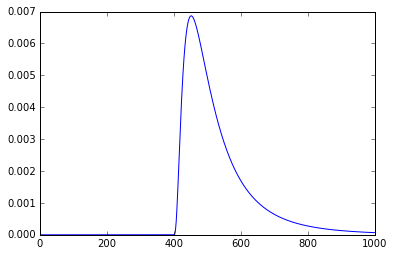

In [17]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1)

ax.plot(lognorm.pdf(np.linspace(1, 1000, 1000), 0.8, loc = 400, scale = 100))

In [18]:
modelDistr = lognorm(1.2, 400, 100)

In [19]:
model_density = modelDistr.pdf(np.linspace(0,1000000,1000000))

In [20]:
plotDensity([
                modelDistr.pdf(np.linspace(0,1000000,1000000)),
                flatten_runs['Highlander'][0]
            ],
           
            axes_limits =[1000, 10000, 0, 0.00001])

NameError: name 'flatten_runs' is not defined

In [21]:
sum(model_density)

1.0000030515069243

In [22]:
for p in [50, 90, 99, 99.99, 99.999]:
    print pdfPercentiles(model_density, p)
    print pdfPercentiles(flatten_runs['Highlander'][0], p)
    print "---------------"

501


NameError: name 'flatten_runs' is not defined

### GO on lognormal

In [37]:
sample_size = 4000000
model_samples = [modelDistr.rvs(sample_size) for i in range(6)]

In [ ]:
sample_pdf = densityFromSample(model_samples[0])[0]

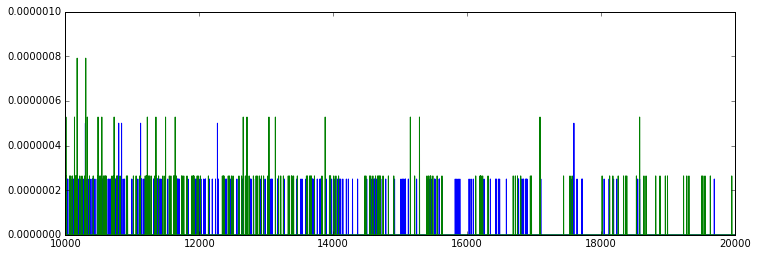

In [131]:
plotDensity([
             sample_pdf,
             runs['Highlander'][0],            
            ], 
           axes_limits = [10000,20000, 0, 0.000001])

In [38]:
samples_pdfs = []
for m in model_samples:
    samples_pdfs.append(densityFromSample(m)[0])

In [39]:
samples_pdfs[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         0.00000000e+00,   0.00000000e+00,   2.50000000e-07])

In [41]:
flatten_pdfs = flattenDensities(samples_pdfs, 10)

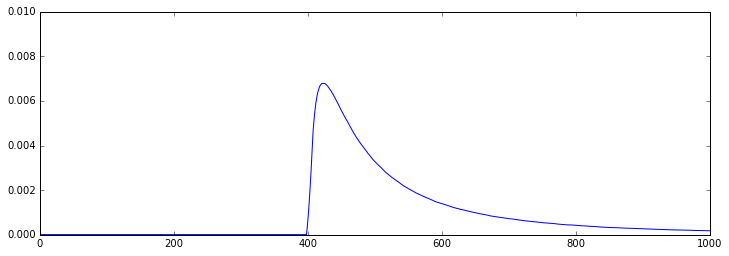

In [43]:
plotDensity([
             #sample_pdf,
             flatten_pdfs[0],            
            ], 
           axes_limits = [0,1000, 0, 0.01])

In [44]:
perc_set = [50, 90, 99, 99.9, 99.99, 99.999]
i = 4
for p in perc_set[-2:]:
    print modelDistr.ppf(float(p) / 100)
    
    print np.percentile(model_samples[i], p, interpolation='higher')
    print pdfPercentiles(samples_pdfs[i], p, )
    print pdfPercentiles(flatten_pdfs[i], p, )

    print "---------------"

9073.1729227
9145.51638173
9125
9136
---------------
17097.914973
17182.3283824
16867
17070
---------------


In [45]:
samples_pdfs[i][:16473].sum()

0.99998849999999995

На данном этапе сглаживание немного удлиняет хвост плотности, завышается значение последней процентили

Генерируем из сглаженной первой плотности много сэмпов.

In [49]:
means = []
stds = []

for i in range(len(flatten_pdfs)):

    percentiles = percentileBootstrap([flatten_pdfs[i]],
                                            perc_set,
                                            percentiles_sample_size = 30,
                                            sample_size = 4000000,
                                            scaling = False)

    percentiles_std = dict()
    percentiles_mean = dict()
    
    for k in percentiles:
        percentiles_mean[k] = np.mean(percentiles[k])
        percentiles_std[k] = np.std(percentiles[k])
        
    means.append(percentiles_mean)
    stds.append(percentiles_std)

In [243]:
means

[{50: 499.0,
  90: 864.4666666666667,
  99: 2026.5,
  99.9: 4441.7003333335433,
  99.99: 8976.9675699984655,
  99.999: 17069.067771956947},
 {50: 499.0,
  90: 864.33333333333337,
  99: 2031.9000000000001,
  99.9: 4449.2003333335433,
  99.99: 8977.9005299991004,
  99.999: 17231.534192966516},
 {50: 499.0,
  90: 864.26666666666665,
  99: 2032.8003333333259,
  99.9: 4502.6338000002934,
  99.99: 8981.1007633320369,
  99.999: 16655.834187633391},
 {50: 499.0,
  90: 864.89999999999998,
  99: 2034.3669999999925,
  99.9: 4482.0336666668763,
  99.99: 9141.8340033321947,
  99.999: 17057.167399638114},
 {50: 499.0,
  90: 864.76666666666665,
  99: 2022.8336666666592,
  99.9: 4512.6668666667929,
  99.99: 9012.6672099990774,
  99.999: 16557.968133276205},
 {50: 499.0,
  90: 865.26666666666665,
  99: 2032.1003333333258,
  99.9: 4502.8004333336057,
  99.99: 9156.6338133325171,
  99.999: 16723.93417930038}]

In [318]:
import collections

def NeymanPearsonStat(mean, std, alpha, check, check_set = None, verbouse = False):
    #if isinstance(check, collections.Iterable):
    #    pass
    #else:
    #    check = [check]
    
    if check_set is None:
        check_set = check
        
    ans = []
    for k in check_set:
        alternative_mean = mean[k] * alpha

        alternative_norm = stats.norm(alternative_mean, std[k])
        basic_norm = stats.norm(mean[k], std[k])
        if verbouse:
            print k
            print alternative_norm.pdf(check[k]), basic_norm.pdf(check[k])
    
        ans.append(basic_norm.pdf(check[k])/alternative_norm.pdf(check[k]))
    
    return  ans

In [329]:
check = dict(zip(perc_set, [np.percentile(model_samples[2], p, interpolation='higher') for p in perc_set]))

In [330]:
NeymanPearsonStat(means[0], stds[0], 1.05, check, [99, 99.9, 99.99, 99.999]) #mean, std, alpha, check

[1.6289882941957672e+182,
 276870926174740.0,
 121.50436032852807,
 5.0150682307040038]

Все величины в Out больше 1, это значит, что тест склоняется к тому что распределения одинаковые. 

### Calc distributions of Neyman-Pearson statistics for $ H_0 $ and for $ H_\infty $

In [50]:
average_stds = dict()

for k in stds[0]:
    average_stds[k] = np.mean([stds[i][k] for i in range(len(stds))])

In [53]:
average_stds

{50: 0.0,
 90: 0.59055458696307717,
 99: 3.4397976763504907,
 99.9: 18.814356655426632,
 99.99: 125.35816353206883,
 99.999: 722.2952126455217}

In [54]:
def singleNP(x, f_stat_0, f_stat_inf):
    return f_0.pdf(x) / f_inf.pdf(x)

In [78]:
def twoSamples(f_0, f_inf, statistic, sample_size = 4000000, 
                            bootstrap_size = 500, plot = True
                            ):
    
    stat_sample_0 = np.zeros(bootstrap_size)
    stat_sample_inf = np.zeros(bootstrap_size)
    
    for i in range(bootstrap_size):
        samp_0 = f_0.rvs(sample_size)
        samp_inf = f_inf.rvs(sample_size)
        
        stat_sample_0[i] = statistic(samp_0)
        stat_sample_inf[i] = statistic(samp_inf)

    if plot:
        plt.hist(stat_sample_0, bins = bootstrap_size / 5)
        plt.hist(stat_sample_inf, bins = bootstrap_size / 5)

        plt.show()
    
    return stat_sample_0, stat_sample_inf

In [246]:
def singleNPDistr(f_0, f_inf, statistic, sample_size = 4000000,
                        bootstrap_size = 100, np_bootstrap_size = 100, plot = True,
                     stat_sample_0 = None, stat_sample_inf = None):
    
    if stat_sample_0 is None and stat_sample_inf is None:
        stat_sample_0, stat_sample_inf = twoSamples(f_0, f_inf, statistic, sample_size, bootstrap_size, plot)

    f_stat_0 = stats.norm(loc = np.mean(stat_sample_0), 
                             scale = np.std(stat_sample_0)**2)
    f_stat_inf = stats.norm(loc = np.mean(stat_sample_inf), 
                             scale = np.std(stat_sample_inf)**2)
    
    np_sample_0 = np.zeros(np_bootstrap_size)
    np_sample_inf = np.zeros(np_bootstrap_size)
    
    for i in range(np_bootstrap_size):
        stat_0 = statistic(f_0.rvs(sample_size))
        stat_inf = statistic(f_inf.rvs(sample_size))
        
        np_sample_0[i] = singleNP(stat_0, f_stat_0, f_stat_inf)
        np_sample_inf[i] = singleNP(stat_inf, f_stat_0, f_stat_inf)
    
    return stat_sample_0, stat_sample_inf, np_sample_0, np_sample_inf

In [24]:
distr_0 = lognorm(1.2, 400, 100)
distr_inf = lognorm(1.2, 380, 100)

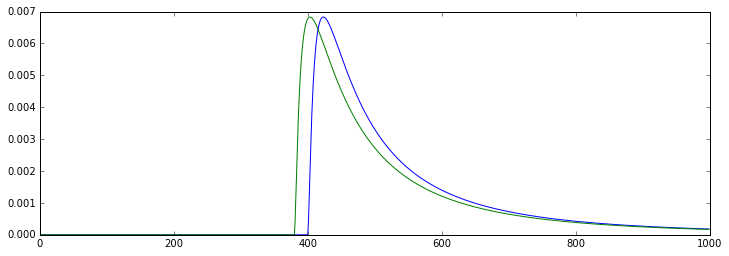

In [76]:
plotDensity([
        distr_0.pdf(np.linspace(0,1000,1000)),
        distr_inf.pdf(np.linspace(0,1000,1000)),
            ],)

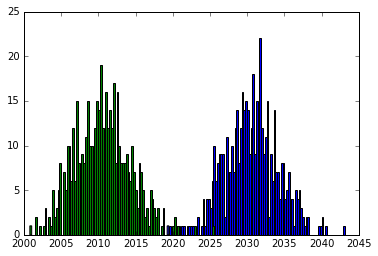

In [77]:
singleNPDistribution(distr_0, distr_inf, lambda x: np.percentile(x, 99))

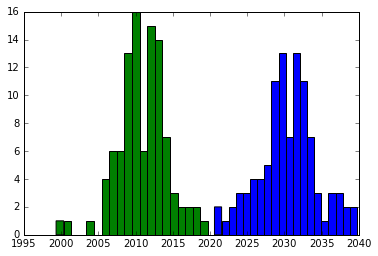

In [88]:
s_0, s_inf, np_0, np_inf = singleNPDistr(distr_0, distr_inf,
                                            lambda x: np.percentile(x, 99), sample_size = 4000000)


[]

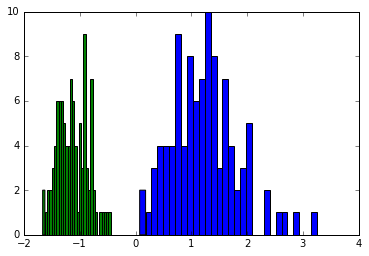

In [101]:
plt.hist(np.log(np_0), bins= 30)
plt.hist(np.log(np_inf), bins = 30)
plt.plot()


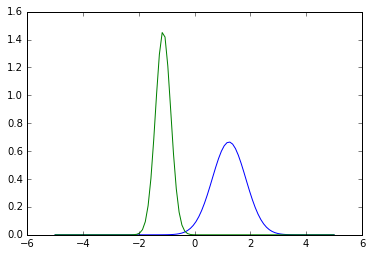

In [105]:
plt.plot(np.linspace(-5,5,100), stats.norm(np.mean(np.log(np_0)), np.std(np.log(np_0))).pdf(np.linspace(-5, 5, 100)))
plt.plot(np.linspace(-5,5,100), stats.norm(np.mean(np.log(np_inf)), np.std(np.log(np_inf))).pdf(np.linspace(-5, 5, 100)))

# _-------------------------

### test on two samples from same distr

#### Here's a small guideline through the method I expect to use. 

#### The test is prepared on lognormal distributition with 99.99tile = 8995 and 99.999tile = 15942, which is pretty close to what we have on Cassandra. 

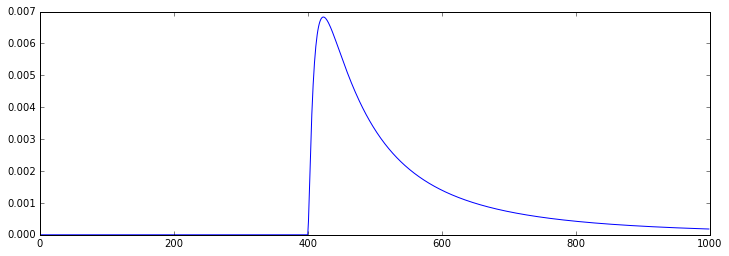

In [25]:
plotDensity([
        distr_0.pdf(np.linspace(0,1000,1000)),
        ])

#### Create two samples from this distribution, which should be marked as the same by our test. Samples sizes are 4000000 each, which is the the same with 10 min Cassandra runs with 10k thpt. 

In [27]:
sample_size = 40000000
base_sample = modelDistr.rvs(sample_size)
check_sample = modelDistr.rvs(sample_size)

In [185]:
base_density = densityFromSample(base_sample)[0]

#### First step is to create and smooth density from the first sample

In [186]:
base_density_smoothed = flattenDensities(base_density, bw=10)[0]

Type changing...


#### Than check percentile values

In [252]:
perc_set = [50, 90, 99, 99.9, 99.99, 99.999]

for p in perc_set:
    print "{0} : ".format(p)
    print "base_sample                    : {0}".format(np.percentile(base_sample, p,))
    print "check_sample                   : {0}".format(np.percentile(check_sample, p, ))
    print "smoothed density of base sample: {0}".format(pdfPercentiles(base_density_smoothed, p))

    print "---------------"

50 : 
base_sample                    : 500.038952833
check_sample                   : 499.956309679
smoothed density of base sample: 500
---------------
90 : 
base_sample                    : 865.246266457
check_sample                   : 865.486882388
smoothed density of base sample: 865
---------------
99 : 
base_sample                    : 2030.69236159
check_sample                   : 2027.15755958
smoothed density of base sample: 2031
---------------
99.9 : 
base_sample                    : 4488.32636528
check_sample                   : 4469.64682472
smoothed density of base sample: 4488
---------------
99.99 : 
base_sample                    : 9078.03708198
check_sample                   : 8990.96505124
smoothed density of base sample: 9080
---------------
99.999 : 
base_sample                    : 17282.8895817
check_sample                   : 16724.2083176
smoothed density of base sample: 17284
---------------


#### Difference like we have on Cassandra can be found on the 99.999tile, so the test will be performed with it

To check if the second sample(check_sample) is drawn from the same pdf by the percentle value, I perform Neyman-Pearson test. 
Step-by-step it looks like this:

1. The base hypothesis is that check sample is drawn from the same density function as base sample, which is smoothed density of base sample.
2. Create a set of alternative hypothesises. Here I'm working with alternatives that the check sample is drawn from the distribution shifted right or left, by 1% of maximum value in the base sample. It's quite reasonable alternative for 99.999tile value. 
3. Generate more samples the same size as the original one from the base distribution and alternatives
4. Calculate 99.999 percentile distributions along the base distr and alternatives
5. The statistic to make a decision is the ratio of likelihoods. Let the 99.999tile value of check sample be $ p $, this means our dicision statistic will be $ L_0(p)/L_{\infty}(p) $, where $ L_0(p) $ stands for likelihood of being drawn from base distr and $ L_{\infty}(p) $ for alternative
6. Then we generate more samples from our base distribution and alternative, and for each of them we calculate the percentile value and than decision statistic, so we have the distribution of decision statistic when the base hypothesis is true and when the alternative is true
8. We set the dicision border for decision statistic, means if it's higher than boarder, we believe in basic hypothesis, if lower in alternative. The way to set it depends on the values of false positives and false negatives that we are ready to see.
7. Finaly we take the check sample 99.999tile value and calculate statistic for it, and make a decision.

Here it is:

In [338]:
from scipy.stats import rv_continuous

class Distr(rv_continuous):
    def __init__(self, pdf):
        self.__pdf = pdf
        
    def _pdf(self, x):
        if x < len(self.__pdf) and x > 0:
            return self.__pdf(round(x))
        else:
            return 0
    
    def _rvs(self, size = 1):
        return np.random.choice(range(len(self.__pdf)), size, p = self.__pdf)
        
    def rvs(self, size = 1):
        return self._rvs(size)
    


In [339]:
base_distr = Distr(base_density_smoothed)

#### Here I create alternatives low_density and high_density

In [233]:
shift = 0.01
shift_absolute = int(round(shift * len(base_density_smoothed)))
print shift_absolute

low_density = base_density_smoothed[shift_absolute:]
high_density = np.hstack((np.zeros(shift_absolute), base_density_smoothed))

1206


In [340]:
low_distr = Distr(low_density)
high_distr = Distr(high_density)

####  This is how the 99.999tile value is disterbed. Blue is for base distribution, green is for higher alternative.

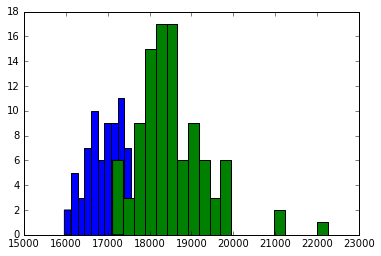

In [235]:
s_base, s_high, np_base, np_high = singleNPDistr(base_distr, high_distr,
                                            lambda x: np.percentile(x, 99.999), sample_size = 4000000)

In [247]:
s_base, s_high, np_base, np_high = singleNPDistr(base_distr, high_distr,
                                            lambda x: np.percentile(x, 99.999), sample_size = 4000000,
                                                np_bootstrap_size = 1000,
                                                stat_sample_0 = s_base, stat_sample_inf = s_high)

#### And this is how decision statistic is disterbed. Blue again is when base hypothesis is true, and green for alternative.

[]

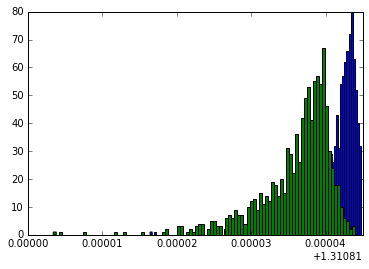

In [255]:
plt.hist(np_base, bins= 100)
plt.hist(np_high, bins = 100)
plt.plot()

In [310]:
all_base = []
all_alt = []
x = []

base_hist = np.histogram(np_base, bins = 100, density=True)
alt_hist = np.histogram(np_high, bins = 100, density = True)

i = 0
j = 0 

while i < len(base_hist[1]) - 2 or j < len(alt_hist[1]) - 2: 
    x.append(min(base_hist[1][i], alt_hist[1][j]))
    all_base.append(base_hist[0][i])
    all_alt.append(alt_hist[0][j])
    if base_hist[1][i + 1] < alt_hist[1][j+1] or j >= len(alt_hist[1]) - 2:
        i += 1
    else:
        j += 1  

In [314]:
false_positive_prop = []
false_negative_prop = []
i = 0
j = 0 

curr_FP = 1
curr_FN = 0

for i in range(1,len(x)):
    false_positive_prop.append(curr_FP)
    false_negative_prop.append(curr_FN)
    
    curr_FP -= all_alt[i] * (x[i] - x[i - 1])
    curr_FN += all_base[i] * (x[i] - x[i - 1 ])

## Here is the main thing! 

#### This plot shows how the False Negative error (FN) of decision based on 99.999 percentile depends on False Positive error(FP). In fact we need to minimize both.
#### For example if we want FN be less than 10% we will get FP about 30%.  This shows that 99.999tile based decision on this sample size is useless, also for real cassandra data even 99.99 is probably useless too. 

#### Possible solution is to increase the sample size. I can find the sample size which will reduce the FP and FN to better values.

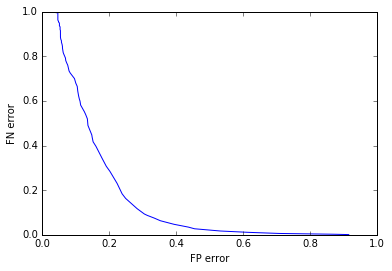

In [322]:
plt.plot(false_negative_prop, false_positive_prop)
plt.ylabel('FN error')
plt.xlabel('FP error')

# Chi squared

In [170]:
stats.chisquare(np.histogram(model_samples[1], bins = l)[0][mask], np.histogram(model_samples[3], bins = l)[0][mask])

NameError: name 'l' is not defined

In [385]:
l = np.logspace(1, 6, 100)

In [386]:
mask = np.histogram(model_samples[1], bins = l)[0] > 100

In [387]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

In [394]:
stats.anderson_ksamp(model_samples)

Anderson_ksampResult(statistic=1.4096638618144726, critical_values=array([ 0.54443267,  1.3318034 ,  1.87581082,  2.39564842,  3.06162317]), significance_level=0.09014867516241108)

In [398]:
stats.anderson_ksamp([sampleFromDensity([runs['Highlander'][i+3]],
                                       sample_size=4000000)
                       for i in range(3)])

Anderson_ksampResult(statistic=14192.237777927301, critical_values=array([ 0.44925884,  1.3052767 ,  1.9434184 ,  2.57696569,  3.41634856]), significance_level=0.0)

#  Precision

In [157]:
from decimal import *

In [45]:
def flattenDecimalDensities(density, bw = 3): 
    new_density = [Decimal(0) for _ in range(len(density) * 2)]

    print getcontext()
    
    for i in range(len(density)):
        if density[i] == Decimal(0):
            pass
        else:
            left_boarder, right_boarder = searchBoarders(density, i, bw)
            for j in range(left_boarder, right_boarder):
                new_density[j] += density[i] / Decimal((right_boarder - left_boarder))
        
        
    return new_density

In [98]:
test_run = runs['Highlander'][0]

test_run_decimal = [decimal.Decimal(i) for i in test_run]

In [175]:
flatten_test_dec = flattenDecimalDensities(test_run_decimal, bw=3)
print sum(flatten_test_dec)

flatten_test_dec = flattenDecimalDensities(test_run_decimal, bw=20)
print sum(flatten_test_dec)

Context(prec=50, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999, capitals=1, flags=[Inexact, Rounded], traps=[DivisionByZero, Overflow, InvalidOperation])
1.0000000000000000004450628742229314344092117039493
Context(prec=50, rounding=ROUND_HALF_EVEN, Emin=-999999999, Emax=999999999, capitals=1, flags=[Inexact, Rounded], traps=[DivisionByZero, Overflow, InvalidOperation])
0.99999366845831708721816221416625602991246069005363


# Go for hummer

### сглаживаем

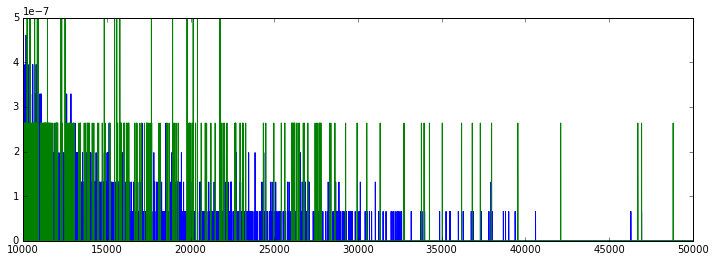

In [8]:
plotDensity([runs['Highlander'][4], runs['Highlander'][1]],
           axes_limits = [10000,50000, 0, 0.0000005])

Type changing...


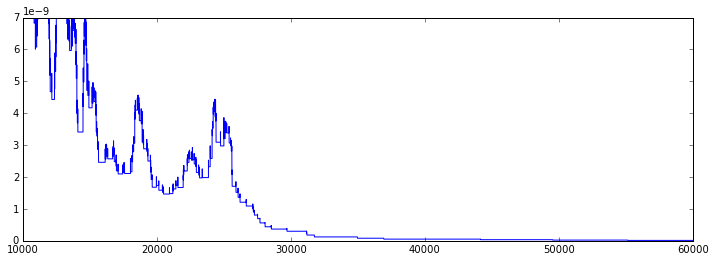

In [12]:
plotDensity(flattenDensities(runs['Highlander'][0], 10),

             #runs['Highlander'],
            
           axes_limits = [10000,60000, 0, 0.000000007])

In [32]:
flatten_runs = dict()

for k in runs:
    flatten_runs[k] = flattenDensities(runs[k], 10)

### Бутстрепим

In [190]:
percentiles_all = dict()
percentiles_all_mean = dict()
percentiles_all_std = dict()

percentiles_set = [50, 90, 99, 99.9, 99.99, 99.999]

for k in ['Highlander']:
    percentiles_all[k] = []
    percentiles_all_mean[k] = []
    percentiles_all_std[k] = []
    
    for i in range(len(flatten_runs[k])):
        print k, " ", i
        
        percentiles = percentileBootstrap([flatten_runs[k][i]],
                                            percentiles_set,
                                            percentiles_sample_size = 1000,
                                            sample_size = 4000000,
                                            scaling = False)

        percentiles_all[k].append(percentiles)
        
        percentiles_mean = dict()
        percentiles_std = dict()
        for perc in percentiles_set:
            percentiles_mean[perc] = np.mean(percentiles[perc])
            percentiles_std[perc] = np.std(percentiles[perc])
            
            
        percentiles_all_mean[k].append(percentiles_mean)
        percentiles_all_std[k].append(percentiles_std) 

Highlander   0
Highlander   1
Highlander   2
Highlander   3
Highlander   4
Highlander   5


In [205]:
ALLERT

In [191]:
percentiles_all_mean

{'Highlander': [{50: 491.0,
   90: 626.25300000000004,
   99: 967.00707999999827,
   99.9: 2452.4744830003042,
   99.99: 8593.3209927983135,
   99.999: 23978.869928593831},
  {50: 482.0,
   90: 611.00300000000004,
   99: 921.48704999999893,
   99.9: 2336.4683580002252,
   99.99: 7935.2652180979312,
   99.999: 25811.502713393256},
  {50: 489.0,
   90: 613.03899999999999,
   99: 905.97203999999908,
   99.9: 2429.8245130003229,
   99.99: 8502.5660803981646,
   99.999: 22595.064223902325},
  {50: 485.0,
   90: 597.49000000000001,
   99: 879.10800999999981,
   99.9: 2876.1995520003475,
   99.99: 9813.5359327984152,
   99.999: 24216.614474872553},
  {50: 491.0,
   90: 629.01199999999994,
   99: 1005.0780999999978,
   99.9: 3205.322578000364,
   99.99: 10000.058956998375,
   99.999: 24816.853408295145},
  {50: 489.0,
   90: 621.99400000000003,
   99: 977.13406999999847,
   99.9: 3207.6055480003452,
   99.99: 10279.567901298469,
   99.999: 23286.630348937451}]}

#### SAVE PERC TO FILE

In [135]:
f = open('Dev_Highlander_Granada_all.data', 'w')
f.write(json.dumps(percentiles_all))
f.close()

f = open('Dev_Highlander_Granada_mean.data', 'w')
f.write(json.dumps(percentiles_all_mean))
f.close()

f = open('Dev_Highlander_Granada_std.data', 'w')
f.write(json.dumps(percentiles_all_std))
f.close()


In [207]:
f = open('Highlander_all_4kk.data', 'w')
f.write(json.dumps(percentiles_all))
f.close()

f = open('Highlander_mean_4kk.data', 'w')
f.write(json.dumps(percentiles_all_mean))
f.close()

f = open('Highlander_std_4kk.data', 'w')
f.write(json.dumps(percentiles_all_std))
f.close()


### Читаем новые заголовки 

In [14]:
runs_dir = "/home/anton/azul/New_config_latency_runs/all0408RD/"

runs_headers = dict(zip(['Dev', 'Granada', 'Highlander'], [[],[],[]]))

for run_file_name in os.listdir(runs_dir):
    if run_file_name.endswith("READ.rd"):
        
        if run_file_name.split('-')[3] == '600':
            runs_headers[run_file_name.split('-')[0]].insert(0, readRDHeader(run_file_name, runs_dir))
        if run_file_name.split('-')[3] == '1800':
            runs_headers[run_file_name.split('-')[0]].append(readRDHeader(run_file_name, runs_dir))
        
        #runs_headers[run_file_name.split('-')[0]].append(readRDHeader(run_file_name, runs_dir))
        

In [147]:
#runs_headers

### Нейман-Пирсон и просто проверки

In [193]:
key = 'Highlander'

for i in range(6):
    for p in [99.99]:
        print p, '-------------------'
        print "flatten          : {0}".format(pdfPercentiles(flatten_runs[key][i], p))

        print "mean             : {0}".format(percentiles_all_mean[key][i][p])
        
        print "headers          : {0}".format(runs_headers[key][i][p])

        print "headers - mean   : {0}".format(runs_headers[key][i][p] - percentiles_all_mean[key][i][p])
        print "headers - flatten   : {0}".format(runs_headers[key][i][p] - pdfPercentiles(flatten_runs[key][i], p))
        print "\n"
    print "________________________________________"

99.99 -------------------
flatten          : 8571
mean             : 8593.3209928
headers          : 8567.0
headers - mean   : -26.3209927983
headers - flatten   : -4.0


________________________________________
99.99 -------------------
flatten          : 7919
mean             : 7935.2652181
headers          : 7911.0
headers - mean   : -24.2652180979
headers - flatten   : -8.0


________________________________________
99.99 -------------------
flatten          : 8489
mean             : 8502.5660804
headers          : 8463.0
headers - mean   : -39.5660803982
headers - flatten   : -26.0


________________________________________
99.99 -------------------
flatten          : 9823
mean             : 9813.5359328
headers          : 9823.0
headers - mean   : 9.46406720158
headers - flatten   : 0.0


________________________________________
99.99 -------------------
flatten          : 10004
mean             : 10000.058957
headers          : 10007.0
headers - mean   : 6.94104300163
headers - 

In [177]:
Highlander_lruns = percentileBootstrap([flatten_runs['Highlander'][4]], 
                                                [99.99, 99.999],
                                                 percentiles_sample_size = 1000,
                                                 sample_size = 1600000
                                                 )

хороший тест - отличить Zing от HotSpot

(array([  7.15639841e-06,   7.15639841e-06,   5.00947889e-05,
          6.44075857e-05,   1.35971570e-04,   2.57630343e-04,
          2.86255936e-04,   2.86255936e-04,   3.14881530e-04,
          4.29383905e-04,   6.08293865e-04,   9.30331794e-04,
          6.65545052e-04,   5.00947889e-04,   4.15071108e-04,
          5.22417084e-04,   5.36729881e-04,   3.79289116e-04,
          2.36161148e-04,   2.14691952e-04,   1.00189578e-04,
          1.00189578e-04,   1.43127968e-05,   4.29383905e-05,
          2.14691952e-05,   0.00000000e+00,   1.43127968e-05,
          0.00000000e+00,   0.00000000e+00,   1.43127968e-05]),
 array([  6773.0021    ,   6912.73719333,   7052.47228666,   7192.20738   ,
          7331.94247333,   7471.67756666,   7611.41265999,   7751.14775333,
          7890.88284666,   8030.61793999,   8170.35303332,   8310.08812666,
          8449.82321999,   8589.55831332,   8729.29340665,   8869.02849998,
          9008.76359332,   9148.49868665,   9288.23377998,   9427.96887331

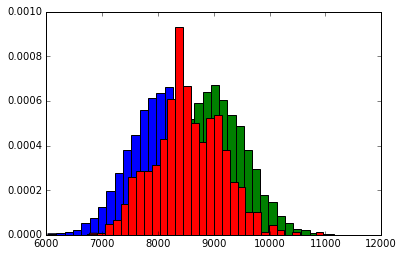

In [71]:

#plt.hist(np.random.normal(np.mean(runs_percentiles['Highlander'][0][99.99]),
#                          np.std(runs_percentiles['Highlander'][0][99.99]), 10000), bins=30, normed=True)
plt.hist(np.random.normal(np.mean(runs_percentiles['Highlander'][0][99.99]) * 0.95,
                          np.std(runs_percentiles['Highlander'][0][99.99]), 10000), bins=30, normed=True)
plt.hist(np.random.normal(np.mean(runs_percentiles['Highlander'][0][99.99])*1.05,
                          np.std(runs_percentiles['Highlander'][0][99.99]), 10000), bins=30, normed=True)
plt.hist(runs_percentiles['Highlander'][0][99.99], bins=30, normed=True)

#plt.hist([9823], bins = 30, normed=True)

In [49]:
runs['Highlander'][1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [103]:
check2 = dict(zip([50,90,99,99.9,99.99], [489, 614, 906, 2431, 8463]))

check3 = dict(zip([50,90,99,99.9,99.99], [485, 598, 880, 2879, 9823]))


In [194]:
percentiles_all_mean

{'Highlander': [{50: 491.0,
   90: 626.25300000000004,
   99: 967.00707999999827,
   99.9: 2452.4744830003042,
   99.99: 8593.3209927983135,
   99.999: 23978.869928593831},
  {50: 482.0,
   90: 611.00300000000004,
   99: 921.48704999999893,
   99.9: 2336.4683580002252,
   99.99: 7935.2652180979312,
   99.999: 25811.502713393256},
  {50: 489.0,
   90: 613.03899999999999,
   99: 905.97203999999908,
   99.9: 2429.8245130003229,
   99.99: 8502.5660803981646,
   99.999: 22595.064223902325},
  {50: 485.0,
   90: 597.49000000000001,
   99: 879.10800999999981,
   99.9: 2876.1995520003475,
   99.99: 9813.5359327984152,
   99.999: 24216.614474872553},
  {50: 491.0,
   90: 629.01199999999994,
   99: 1005.0780999999978,
   99.9: 3205.322578000364,
   99.99: 10000.058956998375,
   99.999: 24816.853408295145},
  {50: 489.0,
   90: 621.99400000000003,
   99: 977.13406999999847,
   99.9: 3207.6055480003452,
   99.99: 10279.567901298469,
   99.999: 23286.630348937451}]}

In [225]:

check = dict(zip(percentiles_set, [runs_headers['Highlander'][1][k] for k in percentiles_set]))


In [226]:
NeymanPearsonStat(percentiles_all_mean['Highlander'][0],
                  percentiles_all_std['Highlander'][0]
                  , 0.05, check)

99
0.00476344396296 0.0 0.0
99.9
0.0136075242894 3.61820625928e-06 7.74087682762e-18
50
nan nan nan
99.99
0.000906072508774 6.95691705077e-06 6.08159112456e-10
99.999
1.87369600744e-10 1.18647332701e-06 0.000175974925993
90
0.0 3.5424297961e-234 0.0


In [200]:
percentiles_all_mean['Highlander'][0].values()

[967.00707999999827,
 2452.4744830003042,
 491.0,
 8593.3209927983135,
 23978.869928593831,
 626.25300000000004]

In [209]:
runs_headers['Highlander'][0]


{50.0: 491.0,
 90.0: 627.0,
 99.0: 968.0,
 99.9: 2449.0,
 99.99: 8567.0,
 99.999: 24191.0,
 'Max': 55135.0,
 'Mean': 513.81,
 'Min': 251.0,
 'Period(ms)': 401311.0,
 'Throughput(ops/sec)': 9445.41,
 'TotalCount': 3790546.0}

In [203]:
_ =plt.hist(runs_percentiles['Highlander'][0][50], bins=30, normed=True)

NameError: name 'runs_percentiles' is not defined

In [204]:
p = 99.99
m = np.mean(runs_percentiles['Highlander'][0][p])
s = np.std(runs_percentiles['Highlander'][0][p])

nrm = stats.norm(m,s).pdf(np.linspace(m * 0.95, m *1.05, 1000))
plt.plot(nrm)
plt.plot(check3[p], max(nrm), 'o')

NameError: name 'runs_percentiles' is not defined

In [ ]:
489, 614, 906, 2431, 8463

In [ ]:
np.hstack([[1], [2]])

In [233]:
-3/4.0 * np.log2(0.75)

0.31127812445913283